<a href="https://colab.research.google.com/github/AntonioLunardi/Analise-Exploratoria-Prefeitura-Curitiba-Python/blob/main/Prefeitura_Curitiba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 - PREPARANDO O AMBIENTE E TRATANDO OS DADOS

### Inicialmente são importadas as bibliotecas utilizadas na análise:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

### Definição do estilo e cores das visualizações:

In [ ]:
cores = sns.color_palette('pastel') # atribuição da paleta a uma variável
sns.color_palette('pastel') # cor da paleta
sns.set_style("whitegrid") # cor do fundo das visualizações

### É feita a leitura dos dados disponibilizados pela prefeitura em https://www.curitiba.pr.gov.br/dadosabertos:

In [ ]:
dados_brutos = pd.read_csv('2022-09-01_Despesas_-_Base_de_Dados.csv', sep=';', encoding = 'latin-1')
# dados = open('2022-09-01_Despesas_Dados.csv', encoding = "ISO-8859-1") # latin-1
dados_brutos

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,2,4,6,8,10,12,14,16,18,20,22,23,26,34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ANO_EMPENHO,DT_EMPENHO,CD_FONTE,DS_FONTE,CD_FUNCAO,DS_FUNCAO,CD_PROGRAMA,DS_PROGRAMA,CD_ACAO,DS_ACAO,...,VL_TOTAL,PROTOCOLOSUP,DT_TRANSACAO,NR_PARCELA,TRANSACAO,VL_LIQUIDADO,VL_DEVOLVIDO,VL_ANULADO,VL_PAGO,VL_CONSIGNADO
0,-----------,----------,--------,--------,---------,---------,-----------,-----------,-------,-------,...,--------,------------,------------,------------,------------,------------,------------,----------,-------,-------------
1,2022,2022-06-09,098,Recursos Próprios do Fundo Municipal de Apoio ...,08,ASSISTÊNCIA SOCIAL,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,2011,DESENVOLVIMENTO E EXECUÇÃO DE AÇÕES DE ATENDIM...,...,"2115,0000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,2022-06-09,098,Recursos Próprios do Fundo Municipal de Apoio ...,08,ASSISTÊNCIA SOCIAL,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,2011,DESENVOLVIMENTO E EXECUÇÃO DE AÇÕES DE ATENDIM...,...,"804,0000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,2022-06-23,024,Recursos Próprios do Fundo Municipal de Habita...,16,HABITAÇÃO,0002,PROGRAMA VIVA CURITIBA CIDADÃ,2066,"MANUTENÇÃO E EXECUÇÃO DOS SERVIÇOS TÉCNICOS, A...",...,NaN,01-122405/2022,2022-07-22 00:00:00.000,1,Anulado de Empenho,"0,00","0,00","532,44","0,00","0,00"
4,2022,2022-06-23,024,Recursos Próprios do Fundo Municipal de Habita...,16,HABITAÇÃO,0002,PROGRAMA VIVA CURITIBA CIDADÃ,2066,"MANUTENÇÃO E EXECUÇÃO DOS SERVIÇOS TÉCNICOS, A...",...,NaN,01-122405/2022,2022-07-14 00:00:00.000,1,Pagamento de Empenho,"0,00","0,00","0,00","1133,44","0,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36082,2022,2022-08-31,114,Programa Dinheiro Direto na Escola - PDDE - Ed...,12,EDUCAÇÃO,2,PROGRAMA VIVA CURITIBA CIDADÃ,2038,TRANSFERÊNCIA DE RECURSOS ÀS ENTIDADES PRIVADA...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36083,2022,2022-08-31,114,Programa Dinheiro Direto na Escola - PDDE - Ed...,12,EDUCAÇÃO,2,PROGRAMA VIVA CURITIBA CIDADÃ,2038,TRANSFERÊNCIA DE RECURSOS ÀS ENTIDADES PRIVADA...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36084,2022,2022-08-31,114,Programa Dinheiro Direto na Escola - PDDE - Ed...,12,EDUCAÇÃO,2,PROGRAMA VIVA CURITIBA CIDADÃ,2038,TRANSFERÊNCIA DE RECURSOS ÀS ENTIDADES PRIVADA...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36085,2022,2022-08-31,0,Recursos Ordinários (Livres),4,ADMINISTRAÇÃO,7,PROGRAMA VIVA CURITIBA TRANSPARENTE,2164,"PROMOÇÃO DA ASSISTÊNCIA GERAL AO SERVIDOR, CON...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Verificação de quantas linhas e colunas há na tabela de gastos:

In [ ]:
dados_brutos.shape

(36087, 41)

In [ ]:
# dados_brutos_sem_a_primeira_linha = dados_brutos[1:]
# dados_brutos_sem_a_primeira_linha

### Como não são necessárias todas as colunas para a presente análise, é criado um novo data frame apenas com as colunas as quais interessam analisar:

In [ ]:
dict_gastos = {'Data do empenho': dados_brutos['DT_EMPENHO'],
               'Área': dados_brutos['DS_FUNCAO'],
               'Programa': dados_brutos['DS_PROGRAMA'],
               'Valor empenhado': dados_brutos['VL_EMPENHADO'],
               'Valor liquidado': dados_brutos['VL_LIQUIDADO']}

In [ ]:
dados_apenas_colunas_utilizadas = pd.DataFrame(data=dict_gastos)
dados_apenas_colunas_utilizadas

,Data do empenho,Área,Programa,Valor empenhado,Valor liquidado
0,----------,---------,-----------,------------,------------
1,2022-06-09,ASSISTÊNCIA SOCIAL,PROGRAMA VIVA CURITIBA QUE NÃO DORME,"5103,00",NaN
2,2022-06-09,ASSISTÊNCIA SOCIAL,PROGRAMA VIVA CURITIBA QUE NÃO DORME,"5103,00",NaN
3,2022-06-23,HABITAÇÃO,PROGRAMA VIVA CURITIBA CIDADÃ,"1665,88","0,00"
4,2022-06-23,HABITAÇÃO,PROGRAMA VIVA CURITIBA CIDADÃ,"1665,88","0,00"
...,...,...,...,...,...
36082,2022-08-31,EDUCAÇÃO,PROGRAMA VIVA CURITIBA CIDADÃ,"3496,00",NaN
36083,2022-08-31,EDUCAÇÃO,PROGRAMA VIVA CURITIBA CIDADÃ,"2136,00",NaN
36084,2022-08-31,EDUCAÇÃO,PROGRAMA VIVA CURITIBA CIDADÃ,"2684,00",NaN
36085,2022-08-31,ADMINISTRAÇÃO,PROGRAMA VIVA CURITIBA TRANSPARENTE,"2050,00",NaN


### Agora é feita a verificação de valores não declarados dentro da tabela. Eles são substituídos por zero para dar andamento à análise. Obviamente já é feito o procedimento no data frame que contém apenas as colunas selecionadas para análise:

In [ ]:
quantidade_vazios = dados_apenas_colunas_utilizadas.isna().value_counts() # consulta por variável booleana
quantidade_vazios

Data do empenho  Área   Programa  Valor empenhado  Valor liquidado
False            False  False     False            False              30885
                                                   True                5202
dtype: int64

In [ ]:
# nova variável com os campos que eram vazios preenchidos com zero:
dados_sem_na = dados_apenas_colunas_utilizadas.fillna(0) 

dados_sem_na.isna().value_counts()

Data do empenho  Área   Programa  Valor empenhado  Valor liquidado
False            False  False     False            False              36087
dtype: int64

### É possível notar que as colunas de valores monetários estão com vírgulas ao invés de pontos, o que quer dizer que estão sendo lidas como strings! Além disso, como demonstrado no teste no campo abaixo, a coluna de datas está sendo lida também como string devido à sua formatação.

### A seguir serão feitas feitas as conversões primeiramente para ponto, e posteriormente para números float das três séries de valores monetários. Analogamente, a coluna de datas é convertida para tipo data


In [ ]:

dados_sem_na['Valor empenhado'][0] = dados_sem_na['Valor empenhado'][0].replace(',', '.')
dados_sem_na['Valor empenhado'][0]

dados_sem_na

,Data do empenho,Área,Programa,Valor empenhado,Valor liquidado
0,----------,---------,-----------,------------,------------
1,2022-06-09,ASSISTÊNCIA SOCIAL,PROGRAMA VIVA CURITIBA QUE NÃO DORME,"5103,00",0
2,2022-06-09,ASSISTÊNCIA SOCIAL,PROGRAMA VIVA CURITIBA QUE NÃO DORME,"5103,00",0
3,2022-06-23,HABITAÇÃO,PROGRAMA VIVA CURITIBA CIDADÃ,"1665,88","0,00"
4,2022-06-23,HABITAÇÃO,PROGRAMA VIVA CURITIBA CIDADÃ,"1665,88","0,00"
...,...,...,...,...,...
36082,2022-08-31,EDUCAÇÃO,PROGRAMA VIVA CURITIBA CIDADÃ,"3496,00",0
36083,2022-08-31,EDUCAÇÃO,PROGRAMA VIVA CURITIBA CIDADÃ,"2136,00",0
36084,2022-08-31,EDUCAÇÃO,PROGRAMA VIVA CURITIBA CIDADÃ,"2684,00",0
36085,2022-08-31,ADMINISTRAÇÃO,PROGRAMA VIVA CURITIBA TRANSPARENTE,"2050,00",0


### É possível notar que certos campos do valor liquidado foram identificados como inteiros, enquanto outros, com vírgula, foram como string:

In [ ]:
type(dados_sem_na['Valor liquidado'][1])

int

### Para garantia de que tudo será adequado, é feita a transformação total em string da coluna 'Valor liquidado', para substituir as vírgulas e uma posterior conversão em float. No mesmo laço de repetição foi realizada a conversão do campo 'Data do empenho', que foi reconhecido como string para o formato data.

In [ ]:
for linha in range(1, len(dados_sem_na)):
  dados_sem_na['Valor empenhado'][linha] = float(dados_sem_na['Valor empenhado'][linha].replace(',', '.'))
  dados_sem_na['Valor liquidado'][linha] = str(dados_sem_na['Valor liquidado'][linha]) 
  dados_sem_na['Valor liquidado'][linha] = float(dados_sem_na['Valor liquidado'][linha].replace(',', '.'))
  dados_sem_na['Data do empenho'][linha] = datetime.strptime(dados_sem_na['Data do empenho'][linha], '%Y-%m-%d').date()


In [ ]:
[type(dados_sem_na['Data do empenho'][36000]), type(dados_sem_na['Valor empenhado'][36000]),
 type(dados_sem_na['Valor liquidado'][36000])] # verificações dos tipos obtidos

[datetime.date, float, float]

In [ ]:
 dados_com_classes_adequadas = dados_sem_na # troca do nome da variável

### Verificação de se há alguma data que não diz respeito a 2022:

In [ ]:
print('Data mais antiga:', min(dados_com_classes_adequadas['Data do empenho'][1:]))
print('Data mais recente:', max(dados_com_classes_adequadas['Data do empenho'][1:]))

Data mais antiga: 2022-06-01
Data mais recente: 2022-08-31


### Segue o comando para remover a primeira linha (índice = 0), que contém apenas uma sequência de hífens em todas as colunas ('---------'):

### Agora que os dados já estão preparados para a análise exploratória, é trocado o nome da variável do data frame para ter um código mais enxuto e organizado:

In [ ]:
dados = dados_com_classes_adequadas.drop([0]) # troca de nome da variável
dados

,Data do empenho,Área,Programa,Valor empenhado,Valor liquidado
1,2022-06-09,ASSISTÊNCIA SOCIAL,PROGRAMA VIVA CURITIBA QUE NÃO DORME,5103.0,0.0
2,2022-06-09,ASSISTÊNCIA SOCIAL,PROGRAMA VIVA CURITIBA QUE NÃO DORME,5103.0,0.0
3,2022-06-23,HABITAÇÃO,PROGRAMA VIVA CURITIBA CIDADÃ,1665.88,0.0
4,2022-06-23,HABITAÇÃO,PROGRAMA VIVA CURITIBA CIDADÃ,1665.88,0.0
5,2022-06-23,HABITAÇÃO,PROGRAMA VIVA CURITIBA CIDADÃ,1665.88,1133.44
...,...,...,...,...,...
36082,2022-08-31,EDUCAÇÃO,PROGRAMA VIVA CURITIBA CIDADÃ,3496.0,0.0
36083,2022-08-31,EDUCAÇÃO,PROGRAMA VIVA CURITIBA CIDADÃ,2136.0,0.0
36084,2022-08-31,EDUCAÇÃO,PROGRAMA VIVA CURITIBA CIDADÃ,2684.0,0.0
36085,2022-08-31,ADMINISTRAÇÃO,PROGRAMA VIVA CURITIBA TRANSPARENTE,2050.0,0.0


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36086 entries, 1 to 36086
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Data do empenho  36086 non-null  object
 1   Área             36086 non-null  object
 2   Programa         36086 non-null  object
 3   Valor empenhado  36086 non-null  object
 4   Valor liquidado  36086 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


## 2 - ANÁLISE EXPLORATÓRIA

### Quais as áreas de gastos que possui a prefeitura?

In [ ]:
areas = dados['Área'].unique()
areas

array(['ASSISTÊNCIA SOCIAL', 'HABITAÇÃO', 'SEGURANÇA PÚBLICA', 'CULTURA',
       'COMÉRCIO E SERVIÇOS', 'PREVIDÊNCIA SOCIAL', 'ENCARGOS ESPECIAIS',
       'ADMINISTRAÇÃO', 'URBANISMO', 'TRABALHO', 'SAÚDE',
       'DESPORTO E LAZER', 'GESTÃO AMBIENTAL', 'SANEAMENTO',
       'ESSENCIAL À JUSTIÇA', 'EDUCAÇÃO', 'DIREITOS DA CIDADANIA'],
      dtype=object)

### Quais são os programas sociais associados?

In [ ]:
programas = dados['Programa'].unique()
programas

array(['PROGRAMA VIVA CURITIBA QUE NÃO DORME',
       'PROGRAMA VIVA CURITIBA CIDADÃ',
       'PROGRAMA VIVA CURITIBA TECNOLÓGICA',
       'PROGRAMA VIVA UMA NOVA CURITIBA',
       'PROGRAMA VIVA CURITIBA TRANSPARENTE',
       'PROGRAMA DE OPERAÇÕES ESPECIAIS',
       'PROGRAMA VIVA CURITIBA MAIS ÁGIL',
       'PROGRAMA VIVA CURITIBA SAUDÁVEL'], dtype=object)

### Quanto foi o total de dinheiro empenhado até então?

In [ ]:
total_empenhado = round(dados['Valor empenhado'].sum())
total_empenhado

8442634177

In [ ]:
total_empenhado_bilhões = total_empenhado/1E9
total_empenhado_bilhões

8.442634177

In [ ]:
print('Valor total empenhado: %.2f' % total_empenhado_bilhões, 'bilhões R$')

Valor total empenhado: 8.44 bilhões R$


### Quanto desse total já foi liquidado? (Quando o serviço é executado ou o produto chega)

In [ ]:
total_liquidado = round(dados['Valor liquidado'].sum())
total_liquidado

2150301511

In [ ]:
total_liquidado_bilhões = total_liquidado/1E9
total_liquidado_bilhões

2.150301511

In [ ]:
print('Valor total empenhado: %.2f' % total_liquidado_bilhões, 'bilhões R$')

Valor total empenhado: 2.15 bilhões R$


### Portentagem do total empenhado já liquidado:

In [ ]:
porcentagem_liquidado = total_liquidado/total_empenhado*100

In [ ]:
print('Fração liquidada do valor empenhado: %.1f' % porcentagem_liquidado, '%')

Fração liquidada do valor empenhado: 25.5 %


### Gastos por área de investimento

In [ ]:
def porcentagem_do_total (valor):
  return round(valor/total_empenhado * 100,2)

In [ ]:
gastos_por_area = dados.groupby('Área').sum().drop(['Programa'], axis=1)

gastos_por_area

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  """Entry point for launching an IPython kernel.


,Valor empenhado,Valor liquidado
Área,,
ADMINISTRAÇÃO,6.912560e+08,1.791893e+08
ASSISTÊNCIA SOCIAL,1.780352e+08,5.818973e+07
COMÉRCIO E SERVIÇOS,4.187260e+08,3.801144e+07
CULTURA,3.786026e+07,1.388801e+07
DESPORTO E LAZER,3.723720e+07,1.043585e+07
DIREITOS DA CIDADANIA,9.411454e+05,8.104613e+04
EDUCAÇÃO,1.360972e+09,3.286059e+08
ENCARGOS ESPECIAIS,3.597147e+08,1.044392e+08
ESSENCIAL À JUSTIÇA,4.060308e+07,1.503550e+07


### Pode-se observar que os valores despendidos nas diversas áreas categorizadas são muito diferentes.

In [ ]:
areas = gastos_por_area.index.sort_values(ascending=True)

areas

Index(['ADMINISTRAÇÃO', 'ASSISTÊNCIA SOCIAL', 'COMÉRCIO E SERVIÇOS', 'CULTURA',
       'DESPORTO E LAZER', 'DIREITOS DA CIDADANIA', 'EDUCAÇÃO',
       'ENCARGOS ESPECIAIS', 'ESSENCIAL À JUSTIÇA', 'GESTÃO AMBIENTAL',
       'HABITAÇÃO', 'PREVIDÊNCIA SOCIAL', 'SANEAMENTO', 'SAÚDE',
       'SEGURANÇA PÚBLICA', 'TRABALHO', 'URBANISMO'],
      dtype='object', name='Área')

In [ ]:
gastos_por_area = gastos_por_area.reset_index(drop=True)
gastos_por_area['Área'] = areas
gastos_por_area['Porcentagem do total empenhado (%)'] = round(porcentagem_do_total(gastos_por_area['Valor empenhado']), 1)
gastos_por_area['Porcentagem liquidado na área (%)'] = round(gastos_por_area['Valor liquidado']/gastos_por_area['Valor empenhado'] * 100, 1)

gastos_por_area.sort_values('Valor empenhado', ascending=False) # ordenando pelo valor empenhado decrescente


,Valor empenhado,Valor liquidado,Área,Porcentagem do total empenhado (%),Porcentagem liquidado na área (%)
13,2.135763e+09,5.571735e+08,SAÚDE,25.3,26.1
11,1.904994e+09,5.509464e+08,PREVIDÊNCIA SOCIAL,22.6,28.9
6,1.360972e+09,3.286059e+08,EDUCAÇÃO,16.1,24.1
16,8.138478e+08,1.765343e+08,URBANISMO,9.6,21.7
0,6.912560e+08,1.791893e+08,ADMINISTRAÇÃO,8.2,25.9
2,4.187260e+08,3.801144e+07,COMÉRCIO E SERVIÇOS,5.0,9.1
7,3.597147e+08,1.044392e+08,ENCARGOS ESPECIAIS,4.3,29.0
12,2.054070e+08,4.724817e+07,SANEAMENTO,2.4,23.0
1,1.780352e+08,5.818973e+07,ASSISTÊNCIA SOCIAL,2.1,32.7
14,1.259438e+08,4.005984e+07,SEGURANÇA PÚBLICA,1.5,31.8


### É possível notar que há uma diversidade grande de taxas de valor liquidado indo de 8.6% a 37%. Pelo que pode ser observado, os valores empenhados neste ano levarão períodos bem maiores do que um ano para serem liquidados. Os valores gastos com saúde, educação e previdência social somados representam uma parcela majoritária do total de gastos da prefeitura.

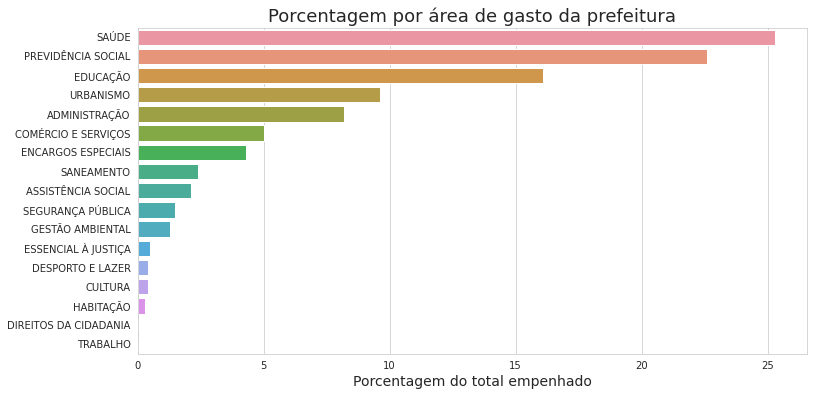

In [ ]:
ax = sns.barplot(data=gastos_por_area.sort_values('Porcentagem do total empenhado (%)', ascending=False), y='Área', x='Porcentagem do total empenhado (%)')
# plotando com valor descrescente

ax.figure.set_size_inches(12, 6)
ax.set_title('Porcentagem por área de gasto da prefeitura', fontsize=18)
ax.set_xlabel('Porcentagem do total empenhado', fontsize=14)
ax.set_ylabel('', fontsize=1)
ax

### Provavelmente os gastos em saúde estão em níveis mais altos que o habitual tendo em vista que os gastos de 2022 contemplam o fim da pandemia de covid 19. Os gastos da previdência já são bastante elevados e devem tender a um aumento contínuo tendo em vista o envelhecimento da população.

In [ ]:
empenhado_prev_saude_educacao = 0
empenhado_urbanismo_adm_comercio_e_servicos = 0
empenhado_demais_areas = 0

# grupo dos 3 maiores gastos
for linha in range(1, len(dados)): 
  if dados['Área'][linha] == ('PREVIDÊNCIA SOCIAL') or dados['Área'][linha] == ('SAÚDE') or dados['Área'][linha] == ('EDUCAÇÃO'):
    empenhado_prev_saude_educacao = (empenhado_prev_saude_educacao + dados['Valor empenhado'][linha])

# gastos entre 5% e 10%
  elif dados['Área'][linha] == ('ADMINISTRAÇÃO') or dados['Área'][linha] == ('COMÉRCIO E SERVIÇOS') or dados['Área'][linha] == ('URBANISMO'): 
    empenhado_urbanismo_adm_comercio_e_servicos = (empenhado_urbanismo_adm_comercio_e_servicos 
    + dados['Valor empenhado'][linha])

  else:
      empenhado_demais_areas = (empenhado_demais_areas + dados['Valor empenhado'][linha])

# vetor com os 3 valores a serem plotados
setores = [empenhado_demais_areas, empenhado_prev_saude_educacao, empenhado_urbanismo_adm_comercio_e_servicos,
          empenhado_demais_areas + empenhado_prev_saude_educacao + empenhado_urbanismo_adm_comercio_e_servicos]

setores # o resultado é coerente, já que a soma dos 3 setores de interesse com os
# demais resulta no valor total de gastos, como calculado previamente

[1117075876.769964, 5401727770.72996, 1923829723.130002, 8442633370.629927]

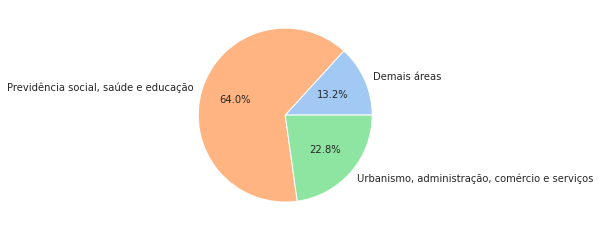

In [ ]:
rotulos = ['Demais áreas', 'Previdência social, saúde e educação', 'Urbanismo, administração, comércio e serviços']
dados_em_setores = [empenhado_demais_areas, empenhado_prev_saude_educacao, empenhado_urbanismo_adm_comercio_e_servicos]
ax = plt.pie(x = dados_em_setores, labels = rotulos, colors = cores, autopct='%.1f%%')


### Dessa forma, é possível notar que um valor muito elevado do gasto público se concentra nessas três áreas.

### Gráficos de gastos por programa social

In [ ]:
gastos_por_programa = dados.groupby('Programa').sum().drop(['Área', 'Valor liquidado'], axis=1)
gastos_por_programa = gastos_por_programa.reset_index(drop=True)
gastos_por_programa['Programa'] = programas

gastos_por_programa



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  """Entry point for launching an IPython kernel.


,Valor empenhado,Programa
0,3.597147e+08,PROGRAMA VIVA CURITIBA QUE NÃO DORME
1,1.869951e+09,PROGRAMA VIVA CURITIBA CIDADÃ
2,7.488849e+08,PROGRAMA VIVA CURITIBA TECNOLÓGICA
3,3.047046e+08,PROGRAMA VIVA UMA NOVA CURITIBA
4,2.135763e+09,PROGRAMA VIVA CURITIBA TRANSPARENTE
5,1.622217e+06,PROGRAMA DE OPERAÇÕES ESPECIAIS
6,2.615316e+09,PROGRAMA VIVA CURITIBA MAIS ÁGIL
7,4.066779e+08,PROGRAMA VIVA CURITIBA SAUDÁVEL


In [ ]:
gasto_total_dos_programas = gastos_por_programa['Valor empenhado'].sum()
gasto_total_dos_programas == total_empenhado

False

### O valor empenhado total não é exatamente o mesmo da soma de todos os programas

In [ ]:
gasto_dos_programas_bilhoes = gasto_total_dos_programas/1E9

print('Valor total dos programas: %.6f' % gasto_dos_programas_bilhoes, 'bilhões R$')
print('Valor total empenhado: %.6f' % total_empenhado_bilhões, 'bilhões R$')

Valor total dos programas: 8.442634 bilhões R$
Valor total empenhado: 8.442634 bilhões R$


### Os valores são muito próximos. Provavelmente o valor computado nos programas não é o mesmo do total  que foi empenhado, apenas, por uma questão de atualização, ou erro no registro do banco de dados, ou ainda que algum gasto não esteja associado a nenhum em programa específico

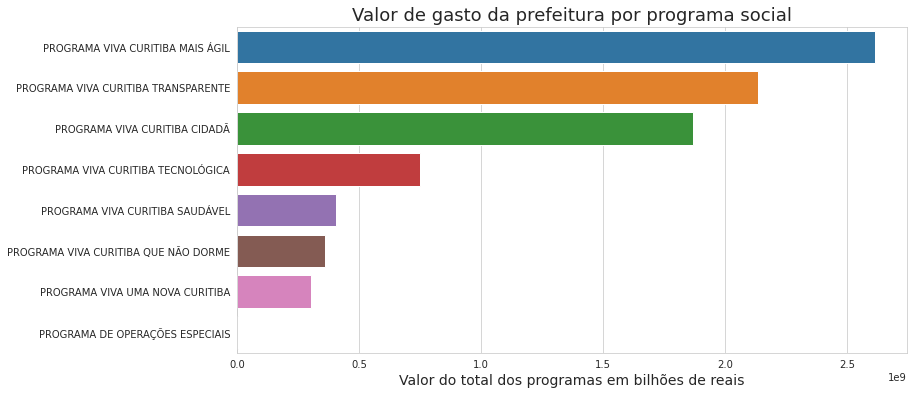

In [ ]:
ax = sns.barplot(data=gastos_por_programa.sort_values('Valor empenhado', ascending=False), y = 'Programa', x='Valor empenhado')
# plotando com valor descrescente

ax.figure.set_size_inches(12, 6)
ax.set_title('Valor de gasto da prefeitura por programa social', fontsize=18)
ax.set_xlabel('Valor do total dos programas em bilhões de reais', fontsize=14)
ax.set_ylabel('', fontsize=1)
ax

### Cabe à sociedade civil cobrar os políticos e seus partidos sobre os valores investidos através dos programas de governo dos mesmos. Especialmente nas eleições, mas também regularmente